In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from fastbook import *
from fastai.vision.widgets import *
from fastai.vision.all import *

In [4]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

# Data set has first character uppercase for cats 
def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224))

learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.169096,0.036188,0.010149,00:47


epoch,train_loss,valid_loss,error_rate,time
0,0.061104,0.076739,0.013532,00:52


In [5]:
pip install azure.cognitiveservices.search.imagesearch

  Using cached https://files.pythonhosted.org/packages/fe/95/8ab27afeecc8d397eae889e3576b4e8884a60fa9ad0c9e0b43ecec89bf69/azure_cognitiveservices_search_imagesearch-2.0.0-py2.py3-none-any.whl


In [6]:
import os
# Key from Microsoft Azure Image API
key = os.environ.get('AZURE_SEARCH_KEY', 'c344db73d0b44b2f8b2735c3c1f7f7a0')
key1 = "c344db73d0b44b2f8b2735c3c1f7f7a0"


In [7]:
# Returns image details for the keyword 
from azure.cognitiveservices.search.imagesearch import ImageSearchClient as api
from msrest.authentication import CognitiveServicesCredentials as auth
import http.client, urllib.request, urllib.parse, urllib.error, base64

def search_image_bing(key, term, min_sz = 128):
  client = api('https://aditi24695.cognitiveservices.azure.com/', auth(key1))
  return L(client.images.search(query=term, count = 150, min_height = min_sz, min_width = min_sz ).value)

search_image_bing

<function __main__.search_image_bing>

In [8]:
# Returns 150 images and extracted url
results = search_image_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [9]:
# Select bear types for grizzly, black and teddy bear
bear_types = 'grizzly', 'black', 'teddy'
path = Path('bears')

In [10]:
if not path.exists():
  path.mkdir()
  for o in bear_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_image_bing(key, f'{o} bear')
    download_images(dest, urls=results.attrgot('content_url'))

In [11]:
fns = get_image_files(path)
fns

(#441) [Path('bears/teddy/00000110.jpg'),Path('bears/teddy/00000086.jpg'),Path('bears/teddy/00000114.jpg'),Path('bears/teddy/00000099.jpg'),Path('bears/teddy/00000009.jpg'),Path('bears/teddy/00000024.jpg'),Path('bears/teddy/00000068.jpg'),Path('bears/teddy/00000007.jpg'),Path('bears/teddy/00000071.jpg'),Path('bears/teddy/00000130.jpg')...]

In [12]:
failed = verify_images(fns)
failed


(#16) [Path('bears/teddy/00000086.jpg'),Path('bears/teddy/00000080.jpg'),Path('bears/teddy/00000069.jpg'),Path('bears/teddy/00000091.jpg'),Path('bears/teddy/00000144.jpg'),Path('bears/teddy/00000131.jpg'),Path('bears/teddy/00000118.jpg'),Path('bears/teddy/00000010.jpg'),Path('bears/teddy/00000022.jpg'),Path('bears/black/00000047.jpg')...]

In [13]:
failed.map(Path.unlink)

(#16) [None,None,None,None,None,None,None,None,None,None...]

In [14]:
bears = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.3, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128)    
)

In [15]:
dls = bears.dataloaders(path)

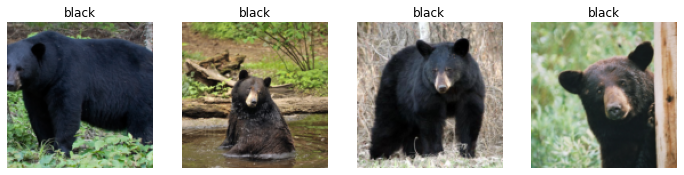

In [16]:
dls.valid.show_batch(max_n = 4, nrows = 1)

In [17]:
bears  = bears.new(
    item_tfms = RandomResizedCrop(224, min_scale=0.5),
    batch_tfms = aug_transforms() 
)

dls = bears.dataloaders(path)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.570069,0.211373,0.086614,00:16


epoch,train_loss,valid_loss,error_rate,time
0,0.229569,0.048608,0.015748,00:16
1,0.164411,0.066326,0.023622,00:16
2,0.118927,0.067308,0.015748,00:16
3,0.092529,0.053046,0.015748,00:16


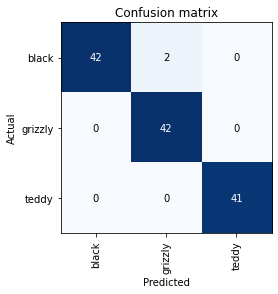

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()